In [ ]:
# import importlib
# import dataset
# import stationary
# import switch
# import plotting
# import pairs
# importlib.reload(dataset)
# importlib.reload(stationary)
# importlib.reload(switch)
# importlib.reload(plotting)
# importlib.reload(pairs)
# from dataset import Dataset
# from stationary import StationarySet
# from switch import SwitchSet
# from plotting import plot_rot_angle
# from pairs import IOPair

In [ ]:
# plt.ioff() #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ioff.html
# plt.close('all')
BOLD_ON = "\033[1m"
BOLD_OFF = "\033[0m"
LAB = "/mnt/c/Users/2020n/Documents/Career/Locations/Britton Lab/"
DATA = LAB + "QWDM_Project/H1_Datasets/"

### Archived testing sections

#### Allowing datasets to go beyond 1 day

In [124]:
filename = 'Datasets/Whole_setup/08-01/Stationary/PAX_1345_stab_1.csv'
with open(filename) as f:
    total_rows = sum(1 for line in f) - 9   # The first 9 rows are info, whitespace, and column names
total_rows

14725

In [116]:
df.shape

(14725, 19)

In [121]:
# Get one-off information in the header
df_temp = pd.read_csv(filepath_or_buffer=filename, delimiter=';', header=None, usecols=[1], nrows=7)
device_id = df_temp.iat[0,0]
serial_num = df_temp.iat[1,0]
wavelength = float(df_temp.iat[4,0])
basic_sample_rate = float(df_temp.iat[5,0])
op_mode = df_temp.iat[6,0] #operating mode string
p_end_index = op_mode.find(' rev')
n_start_index = op_mode.find('ent, ') + 5
n_end_index = op_mode.find(' poi')
op_mode_period = float(op_mode[:p_end_index]) #P part of string
op_mode_FFT_num = int(op_mode[n_start_index:n_end_index]) #N part of string

In [122]:
df_temp

,1
0,PAX1000IR2
1,M00693781
2,1.0.13
3,1.3.1907.145
4,1345
5,400
6,"1 revolution for one measurement, 1024 points ..."


In [165]:
total_rows = 100
set_range = (0.2,None)
time_range = None   # Initially assume we don't want to cut off the times
skiprows = nrows = None   # Initally assume we read all of the file
if set_range is not None:
    per_start, per_end = set_range
    if ((per_start is not None) and (per_start>0) and (per_start<1)) or ((per_end is not None) and (per_end>0) and (per_end<1)):
        print('percentages detected')
        # set_range parameters refer to percentages (e.g. (0.4,0.6) is 40% to 60% of the dataset)
        # If per_start isn't None, skiprows is a number. If per_end isn't None, nrows is rows to use
        skiprows = None if per_start is None else int(total_rows * per_start)
        nrows = None if per_end is None else int(total_rows * (per_end-(0.0 if per_start is None else per_start)))
        # If either of these were changed from None, read_csv will notice and use them appropriately
    else:
        print('times detected')
        time_range = set_range   # O/w, time_range is in seconds; this will be cut further on
        set_range = None
display(skiprows)
display(nrows)

percentages detected


20

None

In [152]:
per_start, per_end = (50,100)
((per_end is not None) and (per_end>0) and (per_end>1))

True

In [169]:
300*.5

150.0

percentages detected


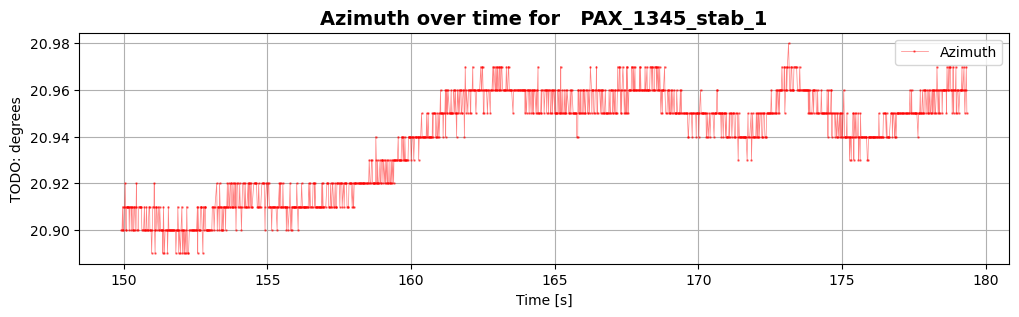

,TimeElapsed,TimeDiff,s1,s2,s3,S0,S1,S2,S3,Azimuth,Ellipticity,DOP,DOCP,DOLP,Power,Power_pol,Power_unpol,Power_split_ratio,Phase_difference
0,149.927,0.000,0.53,0.47,-0.71,4.489,2.352,2.103,-3.156,20.90,-22.51,99.41,70.31,70.28,4.489,4.463,0.02664,0.76,-56.32
1,149.947,0.020,0.53,0.47,-0.71,4.489,2.351,2.103,-3.156,20.90,-22.51,99.40,70.30,70.28,4.489,4.462,0.02671,0.76,-56.32
2,149.967,0.020,0.53,0.47,-0.71,4.488,2.350,2.103,-3.157,20.91,-22.51,99.41,70.33,70.26,4.488,4.462,0.02635,0.76,-56.33
3,149.978,0.011,0.53,0.47,-0.71,4.489,2.351,2.102,-3.157,20.90,-22.51,99.40,70.32,70.25,4.489,4.462,0.02676,0.76,-56.34
4,149.998,0.020,0.53,0.47,-0.71,4.489,2.351,2.102,-3.157,20.90,-22.52,99.40,70.32,70.25,4.489,4.462,0.02702,0.76,-56.35


,TimeElapsed,TimeDiff,s1,s2,s3,S0,S1,S2,S3,Azimuth,Ellipticity,DOP,DOCP,DOLP,Power,Power_pol,Power_unpol,Power_split_ratio,Phase_difference
1467,179.267,0.02,0.53,0.47,-0.71,4.484,2.346,2.105,-3.152,20.95,-22.50,99.41,70.29,70.29,4.484,4.458,0.02662,0.76,-56.26
1468,179.287,0.02,0.53,0.47,-0.71,4.484,2.346,2.106,-3.151,20.96,-22.50,99.41,70.28,70.30,4.484,4.457,0.02658,0.76,-56.25
1469,179.297,0.01,0.53,0.47,-0.71,4.483,2.346,2.105,-3.151,20.96,-22.49,99.40,70.27,70.30,4.483,4.457,0.02675,0.76,-56.25
1470,179.317,0.02,0.53,0.47,-0.71,4.483,2.345,2.107,-3.151,20.97,-22.49,99.42,70.28,70.32,4.483,4.457,0.02604,0.76,-56.23
1471,179.337,0.02,0.53,0.47,-0.71,4.484,2.346,2.105,-3.152,20.95,-22.50,99.41,70.29,70.29,4.484,4.457,0.02664,0.76,-56.26


In [175]:
filename = 'Datasets/Whole_setup/08-01/Stationary/PAX_1345_stab_1.csv'
ds = Dataset(filename, set_range=(0.5,0.6))
ds.plot_raw()
display(ds.df.head())
display(ds.df.tail())

#### Getting interpolation to work

Time range: min=500.009, max=7512.632


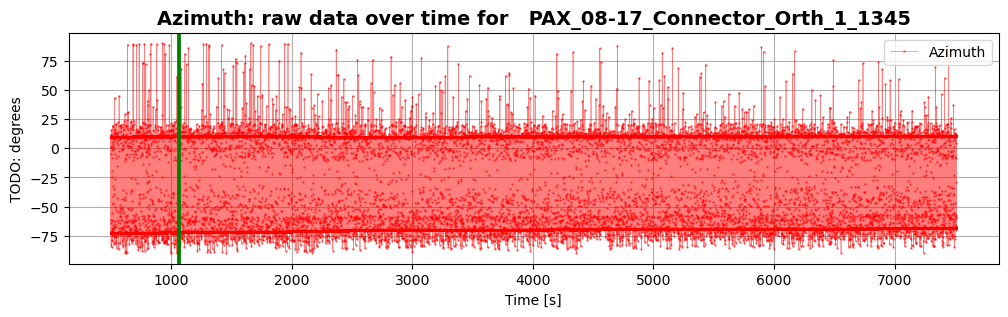

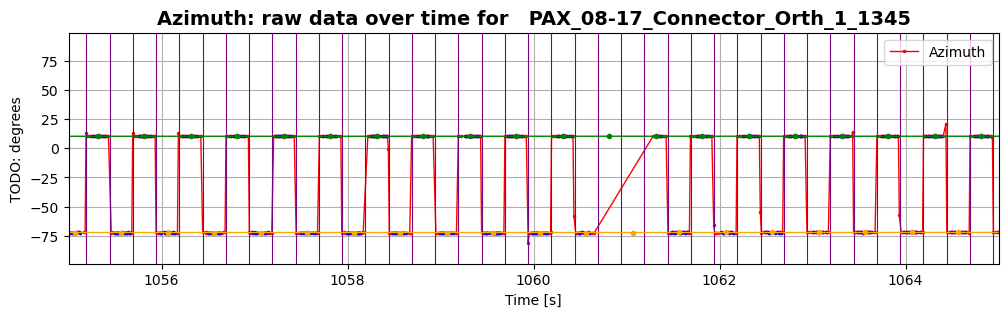

In [128]:
# Example of LARGE JUMP!! HANDLE IN CODE
filename1='Datasets/Whole_setup/08-17/PAX_08-17_Connector_Orth_1_1345.csv'
ds = SwitchSet(filename1,set_range=(500,None))
ds.find_switches(nominal_switch_rate=2, change_point_range_1=(510,610), change_point_range_2=None, print_process=False)
ds.average_data(print_process=False)
ds.plot_raw(sample_range=(1055,1065),plot_switch=True,plot_avg=True,plot_valid=True)

#### Show global time in plots

In [68]:
plt.ioff();

In [71]:
filepath_ARL_1_1345='Datasets/Whole_setup/08-17/PAX_08-17_ARL_Orth_1_1345.csv'
ds = Dataset(filepath_ARL_1_1345,set_range=(0.05,0.25))
#ds = Dataset(filepath_ARL_1_1345,set_range=(0.05,0.10))

Time range: min=2236.844, max=11010.803


In [49]:
t = ds.df.loc[len(ds.df)-1,'Timestamp']
time_str = '{:d}:{:d}'.format(t.hour,t.minute)
time_str

'23:29'

In [41]:
ds.df.shape

(147713, 21)

In [64]:
# Sample datetime value
dt = pd.Timestamp('2021-10-01 13:45:00')
# Convert to 'hh:mm' string format
time_str = dt.strftime('%H:%M')
print(time_str)  # Output: 13:45

13:45


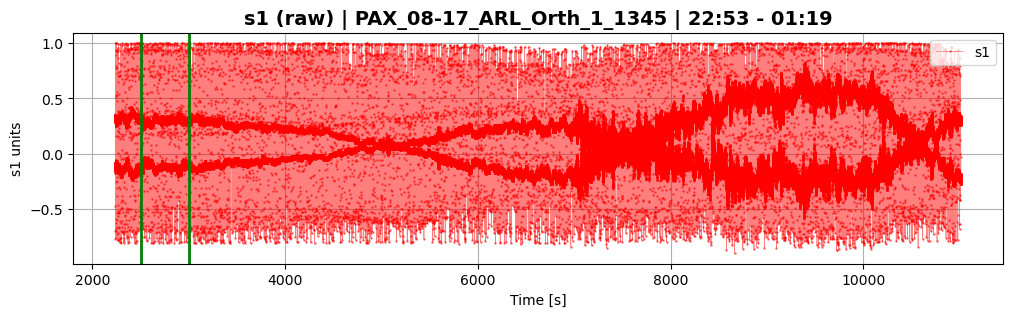

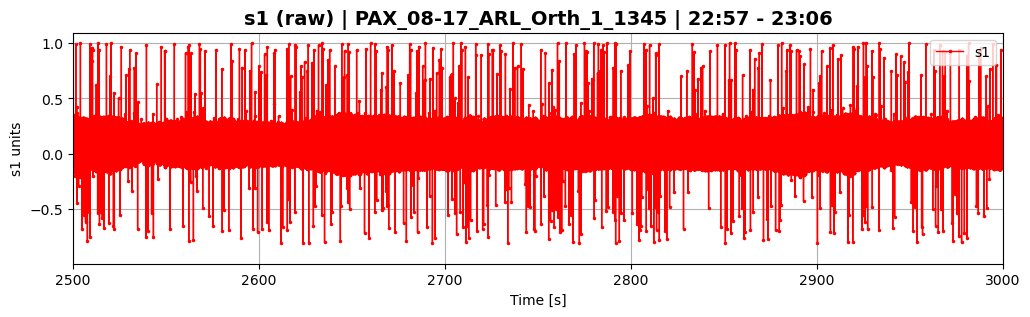

In [72]:
ds.plot_raw(sample_range=(2500,3000))

### Not In Use

In [ ]:
### Old plot method from SwitchSet which attempted to store the figure after each time plotted to reduce time used
### Unfortunately, this was not a worthwhile method and it wasted quite a bit of time
### Keeping it here just in case a piece of code is useful in the future for some reason
    
    def __init__(self, filename, set_range=None, time_offset=0.0):
        super().__init__(filename, set_range, time_offset)
        
        self.change_point_params = []
        self.switch_offset = None
        self.signal_1_df = None
        self.signal_2_df = None
        self.input_polarization = None
        self.transfer_func_df = None
        # We store the figures before plotting since they take a while to compute
        # BE: Birds Eye; ZI fig: Zoomed In
        # self.fig_dict['Azimuth'] =
        # BE_fig_tup,ZI_fig_tup (for az) =
        # [(need update az BE fig?, az BE fig), (need update az ZI fig?, az ZI fig)]
        self.fig_dict = {'Azimuth':[(True,None),(True,None)],
                         'Ellipticity':[(True,None),(True,None)],
                         's1':[(True,None),(True,None)],
                         's2':[(True,None),(True,None)],
                         's3':[(True,None),(True,None)],
                         'S0':[(True,None),(True,None)],
                         'S1':[(True,None),(True,None)],
                         'S2':[(True,None),(True,None)],
                         'S3':[(True,None),(True,None)],
                         'DOP':[(True,None),(True,None)],
                         'Power':[(True,None),(True,None)]}
        
        self.plot_switch = False
        self.plot_jumps = False
        self.plot_valid = True
        self.plot_avg = False
    
    # Plots specified parameter over time
    def plot_raw(self,birds_eye=True,plot_param='Azimuth',sample_range=None,plot_switch=False,plot_jumps=False,plot_valid=True,plot_avg=False,time_offset=0.0):
        # sample_range should be of the form (sample_start, sample_end) if a smaller range is desired
        # if sample_start or sample_end are None themselves, they will be filled in
        if sample_range is not None:
            sample_start = self.df.loc[0, 'TimeElapsed'] if sample_range[0] is None else sample_range[0]
            sample_end = self.df.loc[self.df.shape[0]-1, 'TimeElapsed'] if sample_range[1] is None else sample_range[1]
            sample_range = (sample_start+time_offset, sample_end+time_offset)   # Make sure we include the offset
        
        # TODO: make this into an array
        if plot_switch!=self.plot_switch:
            self.fig_dict[plot_param][1] = (True,self.fig_dict[plot_param][1][1])   # Update plot if plot_switch has changed
            self.plot_switch = plot_switch
        if plot_jumps!=self.plot_jumps:
            self.fig_dict[plot_param][1] = (True,self.fig_dict[plot_param][1][1])   # Update plot if plot_jumps has changed
            self.plot_jumps = plot_jumps
        if plot_valid!=self.plot_valid:
            self.fig_dict[plot_param][1] = (True,self.fig_dict[plot_param][1][1])   # Update plot if plot_valid has changed
            self.plot_valid = plot_valid
        if plot_avg!=self.plot_avg:
            self.fig_dict[plot_param][1] = (True,self.fig_dict[plot_param][1][1])   # Update plot if plot_avg has changed
            self.plot_avg = plot_avg
        # TODO: technically there should be a plot_~thing~ option stored for each plot_param, but I'm going with
        # just storing plot_param for now
        if plot_param!=self.plot_param:
            self.fig_dict[plot_param][1] = (True,self.fig_dict[plot_param][1][1])   # Update plot if plot_switch has changed
            self.plot_param = plot_param
        
        if self.fig_dict[plot_param][0][0]:
            print('updating BE_fig')
            BE_fig, BE_ax = plt.subplots(figsize=(12,3))
            BE_ax.plot(self.df['TimeElapsed'], self.df[plot_param], label=plot_param, linewidth=0.5, marker='o', markersize=0.8, color='red', alpha=0.5)
            BE_ax.set_xlabel('Time [s]')
            BE_ax.set_title('{:s}: raw data over time for   {:s}'.format(plot_param, self.title), fontsize=14, fontweight='bold')
            BE_ax.set_ylabel('TODO: degrees')
            BE_ax.grid(True)
            BE_ax.legend(loc='upper right')
            self.fig_dict[plot_param][0] = (False,BE_fig)
        
        if self.fig_dict[plot_param][1][0] & (sample_range is not None):
            print('updating ZI_fig')
            ZI_fig, ZI_ax = plt.subplots(figsize=(12,3))
            ZI_ax.plot(self.df['TimeElapsed'], self.df[plot_param], label=plot_param, linewidth=1, marker='o', markersize=1.5, color='red')
            ZI_ax.set_xlabel('Time [s]')
            ZI_ax.set_title('{:s}: raw data over time for   {:s}'.format(plot_param, self.title), fontsize=14, fontweight='bold')
            ZI_ax.set_ylabel('TODO: degrees')
            ZI_ax.grid(True)
            ZI_ax.legend(loc='upper right')
            # If change times have been detected, we can plot that extra information
            if (self.switch_param!=None):
                # If requested, plot the estimated switches on the time series data (plot switches on entire dataset)
                if plot_switch:
                    total_switches = int(np.ceil(self.df.at[self.df.shape[0]-1, 'TimeElapsed'] / self.nominal_switch_time))
                    for i in range(total_switches):
                        ZI_ax.axvline(i*self.nominal_switch_time + self.mean_offset, color = 'purple', linewidth=0.8)

                # If requested, plot the detected jumps that were used to determine the switch times
                if plot_jumps:
                    linestyle = '-' if self.switch_param==plot_param else '--'   # Only solid line if plotting the jumps used for change point
                    for i in range(len(self.df)):
                        if self.df.at[i,'IsJump']:
                            X = self.df.loc[i-1:i,'TimeElapsed']
                            Y = self.df.loc[i-1:i,plot_param]
                            ZI_ax.plot(X,Y, linewidth=1, marker='o', markersize=1.5, linestyle=linestyle, color='orange')
                
                # TODO: doing this by groupby may be more efficient/cleaner
                # If requested, overwrite the included points with the color blue
                # Assumes all valid sections start with an IsStartPoint=True and end with an IsEndPoint=True
                if plot_valid:
                    i=0
                    X = []; Y = []
                    while i < len(self.df):
                        if self.df.at[i,'IsStartPoint']:   # We reach the start of a valid section
                            while True:   # Iterate over the valid section, adding all valid points
                                X.append(self.df.at[i,'TimeElapsed'])
                                Y.append(self.df.at[i,plot_param])
                                i+=1
                                if self.df.at[i-1,'IsEndPoint']:   # If the point just added was an end point, break
                                    break
                            ZI_ax.plot(X,Y, linewidth=1, marker='o', markersize=1.5, color='blue')   # Plot the valid section
                            X = []; Y = []
                        else:
                            i+=1

                # If requested and if the data has been averaged, we will plot that overtop the raw data
                if (self.signal_1_df is not None) & plot_avg:
                    plot_avg_std=False
                    plot_param_avg_str = plot_param+"Avg"
                    if plot_avg_std:
                        plot_param_std_str = plot_param+"Std"
                        ZI_ax.errorbar(self.signal_1_df['EstTime'],self.signal_1_df[plot_param_avg_str],yerr=self.signal_1_df[plot_param_std_str],label=plot_param+" 1",linewidth=1,marker='o',markersize=1.5,color='blue')
                        ZI_ax.errorbar(self.signal_2_df['EstTime'],self.signal_2_df[plot_param_avg_str],yerr=self.signal_2_df[plot_param_std_str],label=plot_param+" 2",linewidth=1,marker='o',markersize=1.5,color='purple')
                    else:
                        ZI_ax.plot(self.signal_1_df['EstTime'],self.signal_1_df[plot_param_avg_str],label=plot_param+" 1",linewidth=1,marker='o',markersize=1.5,color='blue')
                        ZI_ax.plot(self.signal_2_df['EstTime'],self.signal_2_df[plot_param_avg_str],label=plot_param+" 2",linewidth=1,marker='o',markersize=1.5,color='purple')
            
            self.fig_dict[plot_param][1] = (False,ZI_fig)   # We update the change point figure tuple
        
        if birds_eye or sample_range is None:
            lines = []
            if sample_range is not None:
                for val in sample_range:
                    line = self.fig_dict[plot_param][0][1].axes[0].axvline(val, color = 'green', linewidth=2)
                    lines.append(line)
            display(self.fig_dict[plot_param][0][1]); plt.close(self.fig_dict[plot_param][0][1])   # Display entire plot without change points plotted
            if sample_range is not None:
                for line in lines:
                    line.remove()
        
        if sample_range is not None:   # Display part of plot with change points plotted
            self.fig_dict[plot_param][1][1].axes[0].set_xlim(sample_range[0],sample_range[1])
            display(self.fig_dict[plot_param][1][1]); plt.close(self.fig_dict[plot_param][1][1])
        #return self.fig_dict[plot_param][0][1], self.fig_dict[plot_param][1][1] #BE fig and ZI fig
        return

In [89]:
### type_specific_method is causing troubles and isn't really needed in the first place; saving it here
class SetPair:
    def __init__(self, filename1, filename2, set_type=Dataset, set_range=None, time_offset=None):
        # time_offset represents time of marker in filename2 minus time of simultaneous marker in filename1
        # If time_offset > 0, filename2 was started behind filename1, and vice versa
        self.dataset1 = set_type(filename1, set_range=set_range)
        self.dataset2 = set_type(filename2, set_range=set_range, time_offset=time_offset)
        self.time_offset = time_offset
        return
    
    # type_specific_method returns a decorator specific to the subclass (either SwitchSet or StationarySet)
    def type_specific_method(set_type):
        error_message = f"Both datasets must be of type {set_type.__name__}"
        # We use a decorator to ensure that relevant methods are being used only when the correct
        # type of datasets are present
        def decorator(method):
            def wrapper(self, *args, **kwargs):
                #print(isinstance(self.dataset1, set_type))
                #print(isinstance(self.dataset2, set_type))
                if isinstance(self.dataset1, set_type) and isinstance(self.dataset2, set_type):
                    return method(self, *args, **kwargs)
                else:
                    raise ValueError(error_message)
            return wrapper
        return decorator
    
    # Note: time_offset and second_range are only relevant when set_title=None
    # (e.g. when we're plotting the entire dataset manually)
    def plot_raw(self, plot_param='Azimuth', sample_range=None, second_range=None, time_offset=None):
        # At any point, we can adjust offset time between the two entire datasets for plotting purposes
        if time_offset is not None:
            self.time_offset = time_offset
        plot_time_offset = 0.0   # If second range is specified, don't include offset
        if second_range is None:   # If second range is not specified, use sample range and time offset
            second_range = sample_range
            plot_time_offset = self.time_offset
        # Plot the entire datasets manually
        self.dataset1.plot_raw(birds_eye=False, plot_param=plot_param, sample_range=sample_range)
        self.dataset2.plot_raw(birds_eye=False, plot_param=plot_param, sample_range=second_range, time_offset=plot_time_offset)
        return
    
    # For a pair of aligned SwitchSets, we will process each one, meaning:
    # Perform change point detection and average the data;
    # 
    @type_specific_method(SwitchSet)
    def process_switch_sets(ds1_input_stab_df, ds2_input_stab_df, nominal_switch_rate, change_point_range_1, change_point_range_2=None, n_exclude=3, print_process=False):
        # Perform change point detection
        self.dataset1.find_switches(nominal_switch_rate, change_point_range_1, change_point_range_2, n_exclude=n_exclude, print_process=print_process)
        self.dataset2.find_switches(nominal_switch_rate, change_point_range_1, change_point_range_2, time_offset=self.time_offset, n_exclude=n_exclude, print_process=print_process)
        # Average the data (within each signal) for each dataset
        self.dataset1.average_data(print_process=print_process)
        self.dataset2.average_data(print_process=print_process)
        
        # We have two datasets; for each, we have the actual dataset of the output signals (self.dataset1)
        # as well as the dataset of the corresponding input
        for input_switch_df, input_stab_df in [(self.dataset1,ds1_input_stab_df),(self.dataset2,ds2_input_stab_df)]:
            input_stab_jv_upper, input_stab_jv_lower = input_stab_df.average_pol()
            input_pols = input_switch_df.average_pol()
            signal_1_dif = np.sqrt((input_stab_jv_upper-input_pols[0])**2+(input_stab_jv_lower-input_pols[1])**2)
            signal_2_dif = np.sqrt((input_stab_jv_upper-input_pols[2])**2+(input_stab_jv_lower-input_pols[3])**2)
            signal_1_upper,signal_1_lower = input_pols[0],input_pols[1] if (signal_1_dif<=signal_2_dif) else input_pols[0],input_pols[1]
            signal_2_upper,signal_2_lower = input_pols[2],input_pols[3] if (signal_1_dif<=signal_2_dif) else input_pols[2],input_pols[3]
            input_switch_df.calc_transfer(signal_1_upper,signal_1_lower,signal_2_upper,signal_2_lower)
            
        ds1_s1 = self.dataset1.signal_1_df
        ds1_s2 = self.dataset1.signal_2_df
        ds2_s1 = self.dataset2.signal_1_df
        ds2_s2 = self.dataset2.signal_2_df
    
    @type_specific_method(StationarySet)
    def plot_adev(self, plot_param='Azimuth'):
        params_arr = []
        for ds in [self.dataset1, self.dataset2]:
            taus2,ad,ade,ns = ds.adev(plot_param=plot_param,num_taus=5000)
            label = ds.title
            params_arr.append((taus2,ad,ade,ns,label))
        StationarySet.plot_adev(params_arr)
        return params_arr
    
    @type_specific_method(SwitchSet)
    def plot_adev(self, plot_param='Azimuth'):
        params_arr = []
        for ds in [self.dataset1, self.dataset2]:
            taus2,ad,ade,ns = ds.adev(plot_param=plot_param,num_taus=5000)
            label = ds.title
            params_arr.append((taus2,ad,ade,ns,label))
        StationarySet.plot_adev(params_arr)
        return params_arr

### Basic Troubleshooting of Dataset class

In [66]:
# TEMP
# Example DataFrame
data = {
    'IsValid': [True, True, True, False, False, True, True, False, True, False],
    'Time': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Data': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
}
df = pd.DataFrame(data)

# Create a mask for identifying contiguous sections of 'True' or 'False' values
# 'mask' is the cumulative sum of changes in 'IsValid' values; if 'IsValid' changes value, mask will increment
# This means every point in a 'True' or a 'False' section will have the same mask value, but mask values
# will change between sections
df['dif'] = df['IsValid'] != df['IsValid'].shift(); df['mask'] = (df['dif']).cumsum()
df['mask'] = df['mask'] - df.at[df.index[df['IsValid']].min(),'mask']   # Ensures first True section has mask value 0
df['membership'] = (df['mask'] % 4)
display(df)   # Use this line to see dif and mask in df
# df[df['IsValid']] excludes all False values.
# We then group by the mask value to separate 'True' values into different sections (one group for each section)
# groups.agg() performs aggregation functions on each group
new_df = df[df['IsValid']].groupby(mask).agg(
    StartTime=('Time', 'first'),
    AvgData=('Data', 'mean'),
    NumPoints=('Time', 'size')
).reset_index(drop=True)
df.drop(columns=['dif', 'mask', 'membership'], inplace=True)

display(new_df)

,IsValid,Time,Data,dif,mask,membership
0,True,0,10,True,0,0
1,True,1,20,False,0,0
2,True,2,30,False,0,0
3,False,3,40,True,1,1
4,False,4,50,False,1,1
5,True,5,60,True,2,2
6,True,6,70,False,2,2
7,False,7,80,True,3,3
8,True,8,90,True,4,0
9,False,9,100,True,5,1


,StartTime,AvgData,NumPoints
0,0,10.0,1
1,1,25.0,2
2,5,65.0,2
3,8,90.0,1


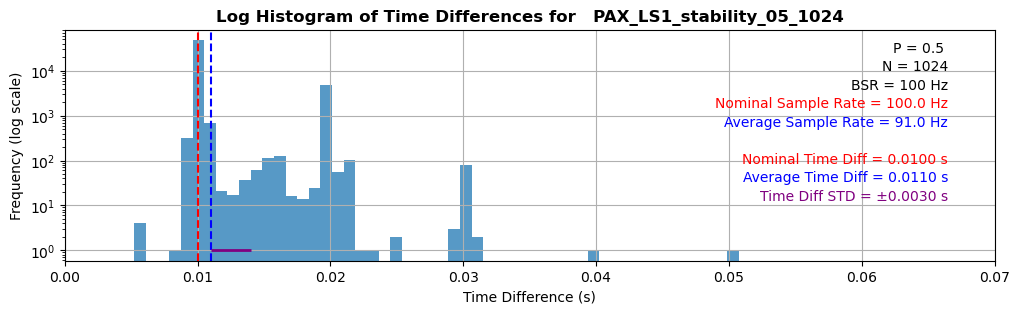

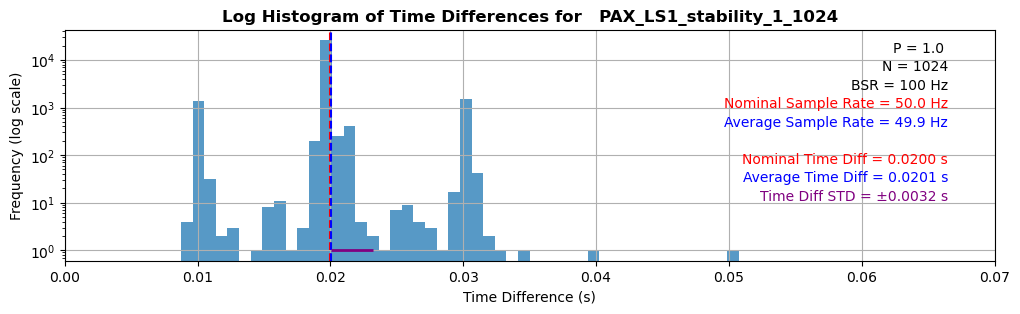

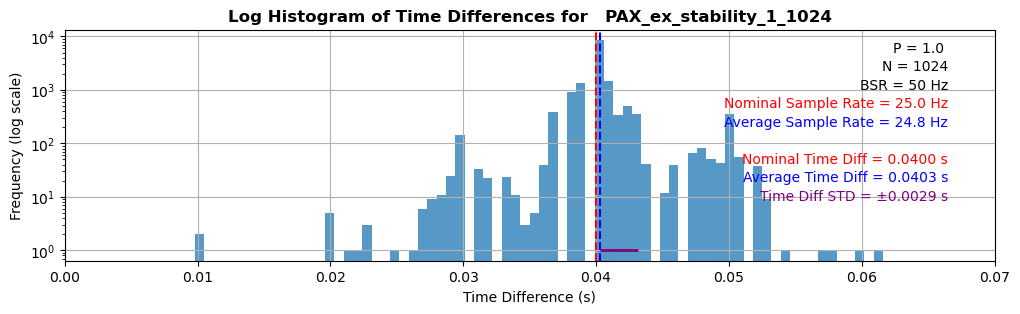

In [65]:
#Testing time diff histograms
plt.ioff()
filename_1 = "Datasets/PAX_stability/LS1_test_1/PAX_LS1_stability_05_1024.csv"
ds1 = SwitchSet(filename_1)
filename_2 = "Datasets/PAX_stability/LS1_test_1/PAX_LS1_stability_1_1024.csv"
ds2 = SwitchSet(filename_2)
filename_3 = "Datasets/PAX_stability/PAX_ex_stability_1_1024.csv"
ds3 = SwitchSet(filename_3)

display(ds1.rate_hist(bins=80, xmax=0.07))
display(ds2.rate_hist(bins=80, xmax=0.07))
display(ds3.rate_hist(bins=100, xmax=0.07))

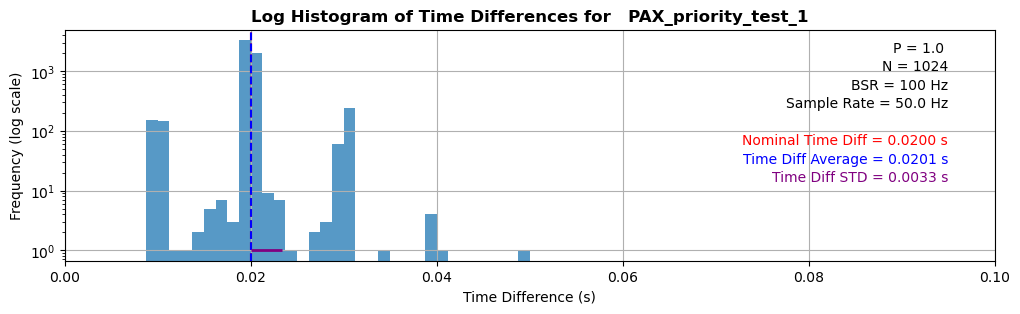

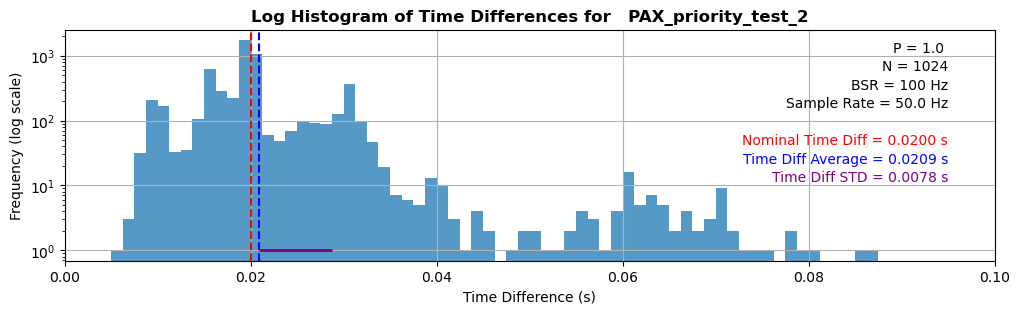

In [7]:
folder_path = 'Datasets/PAX_priority'
datasets = []
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        file_path = os.path.join(folder_path, file_name)
        ds = Dataset(file_path)
        datasets.append(ds)

plt.ioff()
plt.close('all')
hist_arr = [d.rate_hist(bins=80, xmax=0.10) for d in datasets]
for f in hist_arr:
    display(f)